### Import all necessary library

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
from random import randint
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPooling2D, UpSampling2D
from keras.datasets import fashion_mnist
from keras import Input, Model

In [2]:
(X_train, y_train), (X_test,y_test) = fashion_mnist.load_data()
X_train.shape , y_train.shape, X_test.shape, y_test.shape

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

In [3]:
print(X_train.max())
print(X_train.min())
X_train = X_train/255.0
X_test = X_test/255.0
print(X_train.max())
print(X_train.min())

255
0
1.0
0.0


In [4]:
X_train = np.expand_dims(X_train,-1)
X_test = np.expand_dims(X_test,-1)
X_train.shape

(60000, 28, 28, 1)

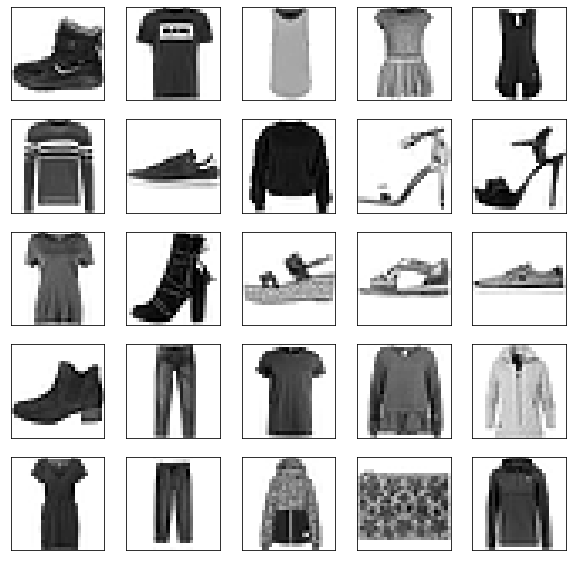

In [5]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(X_train[i], cmap=plt.cm.binary)
    
plt.show()

In [6]:
def build_network(input_image):
      
    # Building the encoder of the Auto-encoder
    x = Conv2D(16, (3, 3), activation ='relu', padding ='same')(input_image)
    x = MaxPooling2D((2, 2), padding ='same')(x)
    x = Conv2D(8, (3, 3), activation ='relu', padding ='same')(x)
    x = MaxPooling2D((2, 2), padding ='same')(x)
    x = Conv2D(8, (3, 3), activation ='relu', padding ='same')(x)
    encoded_layer = MaxPooling2D((2, 2), padding ='same')(x)
      
    # Building the decoder of the Auto-encoder
    x = Conv2D(8, (3, 3), activation ='relu', padding ='same')(encoded_layer)
    x = UpSampling2D((2, 2))(x)
    x = Conv2D(8, (3, 3), activation ='relu', padding ='same')(x)
    x = UpSampling2D((2, 2))(x)
    x = Conv2D(16, (3, 3), activation ='relu')(x)
    x = UpSampling2D((2, 2))(x)
    decoded_layer = Conv2D(1, (3, 3), activation ='sigmoid', padding ='same')(x)
      
    return decoded_layer

In [7]:
input_image = Input(shape =(28, 28, 1))

In [8]:
decoded_layer = build_network(input_image)

In [9]:
autoencoder = Model(input_image, decoded_layer)
autoencoder.compile(optimizer ='adam', loss ='binary_crossentropy')

In [10]:
autoencoder.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 28, 28, 1)]       0         
                                                                 
 conv2d (Conv2D)             (None, 28, 28, 16)        160       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 16)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 8)         1160      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 7, 7, 8)          0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 7, 7, 8)           584   

In [11]:
history = autoencoder.fit(X_train,X_train,epochs=10,batch_size=256, shuffle=True, validation_data=(X_test,X_test))

Epoch 1/10
235/235 [==============================] - 49s 203ms/step - loss: 0.3932 - val_loss: 0.3205
Epoch 2/10
235/235 [==============================] - 44s 188ms/step - loss: 0.3107 - val_loss: 0.3071
Epoch 3/10
235/235 [==============================] - 43s 185ms/step - loss: 0.3024 - val_loss: 0.3025
Epoch 4/10
235/235 [==============================] - 44s 188ms/step - loss: 0.2981 - val_loss: 0.2991
Epoch 5/10
235/235 [==============================] - 49s 210ms/step - loss: 0.2952 - val_loss: 0.2957
Epoch 6/10
235/235 [==============================] - 47s 201ms/step - loss: 0.2929 - val_loss: 0.2942
Epoch 7/10
235/235 [==============================] - 47s 201ms/step - loss: 0.2912 - val_loss: 0.2925
Epoch 8/10
235/235 [==============================] - 42s 181ms/step - loss: 0.2900 - val_loss: 0.2912
Epoch 9/10
235/235 [==============================] - 42s 180ms/step - loss: 0.2890 - val_loss: 0.2910
Epoch 10/10
235/235 [==============================] - 42s 181ms/step - l

In [19]:
print("Training Accuracy")
print(autoencoder.evaluate(X_train,X_train))
print("Test accuracy")
print(autoencoder.evaluate(X_test,X_test))

Training Accuracy
1875/1875 [==============================] - 22s 12ms/step - loss: 0.2875
0.28752318024635315
Test accuracy
313/313 [==============================] - 4s 12ms/step - loss: 0.2895
0.28950566053390503


In [20]:
pred = autoencoder.predict(X_test)

313/313 [==============================] - 4s 11ms/step


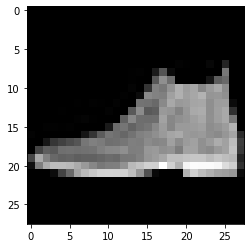

In [21]:
plt.imshow(X_test[0])

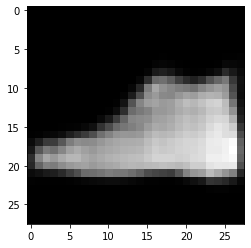

In [22]:
plt.imshow(pred[0])

In [23]:
def visualize(model, X_test):
      
    # Reconstructing the encoded images
    reconstructed_images = model.predict(X_test)
      
    plt.figure(figsize =(20, 4))
    for i in range(1, 11):
          
        # Generating a random to get random results
        rand_num = randint(0, 10001)
      
        # To display the original image
        ax = plt.subplot(2, 10, i)
        plt.imshow(X_test[rand_num].reshape(28, 28))
        plt.gray()
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)
  
        # To display the reconstructed image
        ax = plt.subplot(2, 10, i + 10)
        plt.imshow(reconstructed_images[rand_num].reshape(28, 28))
        plt.gray()
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)
          
    # Displaying the plot
    plt.show()

313/313 [==============================] - 4s 11ms/step


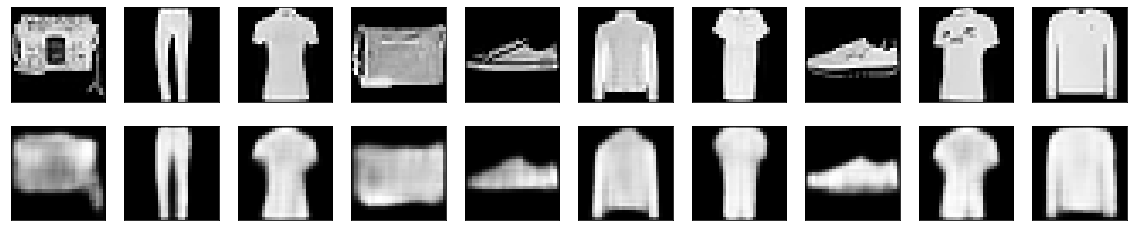

In [24]:
visualize(autoencoder, X_test)